# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
### Data Munging with Pandas

#### Task overview
We have a file that contains the gender, height and weight information. A typical line of the file is:

"Male",66.3162319187446,170.593858104457

We want to store all such lines in convenient data structures as three separate items and be able to manipulate them.

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "Asokan" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9840911857" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M0W0_Python_Data-Munging" #name of the notebook
Answer = "Ungraded"

def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Week0-part_gender_height_weight.csv")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Week0-full_gender_height_weight.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



In [0]:
## We take a look at the contents of the file 
## by using the shell command head
!head Week0-part_gender_height_weight.csv

We start by simply reading the file and storing it. But we want to skip the first line as it is a header and does not have data. We also want to store the data instead of merely printing it. But we will print the first ten items to verify that all is well.

In [0]:
import pandas as pd

In [0]:
PART_DATA = "Week0-part_gender_height_weight.csv"
FULL_DATA = "Week0-full_gender_height_weight.csv"

In [0]:
firstLine = True
data = []
for line in open(FULL_DATA):
    if firstLine:
        firstLine = False
    else:
        data.append(line)
print(data[:10])

As you can see, there are some extraneous stuff:
  1. A \n at the end of each line
  2. The double quotes around the gender
  3. Also the line is a single string separated by commas
  
We handle these issues in the next version 

In [0]:
firstLine = True
COMMA = ','
QUOTE = '"'
data = []
for line in open(PART_DATA):
    if firstLine:
        firstLine = False
    else:
        g, h, w= line.strip().split(COMMA)
        data.append([g.strip(QUOTE), float(h), float(w)])
print(data[:10])

Now we need to convert inches to cm, pounds to kg and round these to the nearest integer and we are done. Here is the final code to do the same.

In [0]:
firstLine = True
COMMA = ','
QUOTE = '"'
INCH2CM = 2.54
POUND2KG = 0.4536
data = []
for line in open(PART_DATA):
    if firstLine:
        firstLine = False
    else:
        g, h, w = line.strip().split(COMMA)
        g = g.strip(QUOTE)
        h_cm = int(float(h) * INCH2CM + 0.5)
        w_kg = int(float(w) * POUND2KG + 0.5)
        data.append([g, h_cm, w_kg])
print(data[:4])

One reason python is popular for Scientific Computing is the availability of libraries that do a lot of standard, grunt work in a few lines. We will see how the pandas library can make short work of all the above

In [0]:
import pandas as pd
pd.read_csv(PART_DATA)

As you can see, pandas gives you a nice display! It figured out the column titles and numbered the data also. It actually loads the data into a dataframe, and we can treat each column as a dictionary whose key is the column name and value is the actual data in the column. Note that the datatype has been inferred too.

In [0]:

data = pd.read_csv(FULL_DATA)
type(data['Gender'][0]), type(data['Height'][1]), type(data['Weight'][30])

In [0]:
data['Weight']

In [0]:
data.Weight

Pandas gives you even more flexibility as part of the read_csv function. We can attach converters to selected columns. 

In [0]:
def inches2cms(s):
    return int(float(s) * 2.54 + 0.5)
def pounds2kgs(s):
    return int(float(s) * 0.4536 + 0.5)

In [0]:
pd.read_csv(FULL_DATA, converters={'Height':inches2cms, 'Weight':pounds2kgs})

So our final code will be

In [0]:
import pandas as pd

def inches2cms(s):
    return int(float(s) * 2.54 + 0.5)
def pounds2kgs(s):
    return int(float(s) * 0.4536 + 0.5)
data = pd.read_csv(FULL_DATA, converters={'Height':inches2cms, 'Weight':pounds2kgs})
data[:10]

In [0]:
pd.read_csv?

Now it is very easy to plot the data.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

def inches2cms(s):
    return int(float(s) * 2.54 + 0.5)
def pounds2kgs(s):
    return int(float(s) * 0.4536 + 0.5)
data = pd.read_csv(FULL_DATA, converters={'Height':inches2cms, 'Weight':pounds2kgs})
plt.plot(data['Height'], data['Weight'], '*')
plt.xlabel("Height cms")
plt.ylabel("Weight kgs")
plt.show()

In [0]:
male = data[data.Gender == "Male"]
female = data[data.Gender == "Female"]

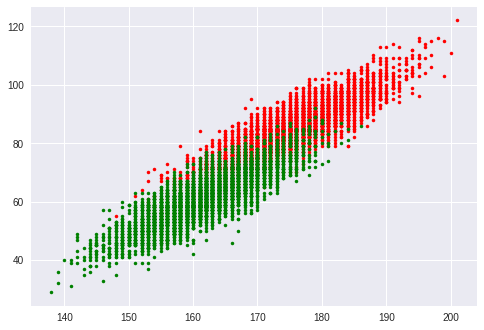

In [20]:
plt.plot(male['Height'], male['Weight'], 'r.')
plt.plot(female['Height'], female['Weight'], 'g.')
plt.show()

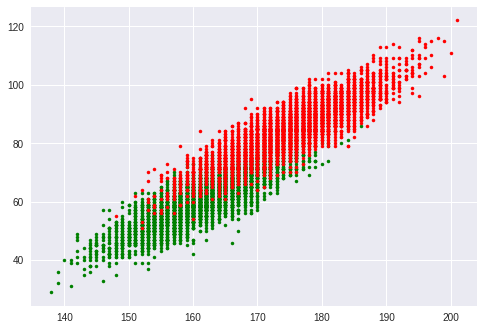

In [21]:
plt.plot(female['Height'], female['Weight'], 'g.')
plt.plot(male['Height'], male['Weight'], 'r.')
plt.show()

In [0]:
d10 = data[:10]

In [0]:
d10

In [0]:
d10.iloc?

In [0]:
for line in d10:
    print(line)

In [0]:
for line in d10.values:
    print(line)

In [0]:
male = data[data.Gender=='Female']
male

In [0]:
d10[d10.Height ==170]

In [0]:
heavy=data[data.Weight >115]
heavy

In [0]:
data.drop?

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = " " #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = " " #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")